In [2]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)
pd.set_option('display.max_columns', 50)

In [3]:
## OBTENEMOS TODA LA INFORMACIÓN DE LOS DIFERENTES CSV.
eventos = pd.read_csv('events.csv')

In [4]:
## OBTENEMOS INFORMACIÓN BÁSICA SOBRE NUESTRO CSV.
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [5]:
## CONSULTAMOS CANTIDADES Y UNICIDADES EN GENERAL.
eventos.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838.0,564284,563836,563836,563836,221699,48967,3598,82796,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3885.0,202,5,8,63,35310,5851,14,24,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",Iphone,CustomerService,google,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4311.0,50916,243014,190833,132960,594,1207,1528,58153,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


In [6]:
## TOMAMOS LOS PRIMEROS DIEZ ELEMENTOS COMO PARA VER QUE TIPO DE INFORMACIÓN TIENEN.
eventos.head(10)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,criteo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [7]:
## CONTAMOS LAS APARICIONES DE CADA CIUDAD.
eventos['city'].value_counts()

Unknown                   15819
São Paulo                 11711
Rio de Janeiro             3538
Belo Horizonte             2568
Salvador                   2314
Brasília                   1530
Osasco                     1148
Curitiba                   1132
Fortaleza                  1084
Recife                      913
Goiânia                     853
Porto Alegre                799
Guarulhos                   776
São Bernardo do Campo       716
Belém                       640
São Luís                    597
Manaus                      507
Natal                       487
Montes Claros               482
Campinas                    471
Barueri                     466
Santo André                 434
Duque de Caxias             429
Petrolina                   424
Teresina                    388
Sorocaba                    376
Campo Grande                373
Maceió                      370
Contagem                    348
Nova Iguaçu                 311
                          ...  
Santa Fi

In [8]:
## CONTAMOS LAS APARICIONES DE CADA EVENTO.
eventos['event'].value_counts()

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [9]:
## CONTAMOS LAS APARICIONES DE CADA TIPO DE DISPOSITIVO.
eventos['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [10]:
## CONTAMOS LAS APARICIONES DE CADA VERSIÓN DEL SO.
eventos['operating_system_version'].value_counts()

Windows 7             19675
Windows 10            17110
Android 7              9964
Android 6.0.1          7805
Android 6              6871
Android 5.1.1          4123
Android 7.1.1          3325
Windows 8.1            2781
Android 5.0.2          1640
Android 4.4.2          1402
iOS 11.3               1345
Android 4.4.4          1288
Android 5.1            1269
Android 8               973
Android 5.0.1           746
iOS 10.3.3              738
Windows 8               732
Windows XP              613
Android 4.2.2           566
Android 4.1.2           519
Android 5               321
Android 4.3             318
Linux                   293
iOS 11.2.6              286
iOS 9.3.5               268
Windows Phone 10        252
iOS 11.4                231
Windows Phone 8.1       200
iOS 11.2.5              147
Android 7.1.2           141
                      ...  
Mac OS X 10.12.3          2
Mac OS X 10.10.2          2
Android 3.1               2
iOS 3.2                   2
Mac OS X 10.6       

In [11]:
## CREAMOS UNA COLUMNA CON CONTENIDO VACIO.
eventos['sistema'] = ''

In [12]:
## SEGÚN QUE FAMILIA DE SO POSEA ACTUALIZAMOS NUESTRA NUEVA COLUMNA.
eventos.loc[eventos.operating_system_version.str.contains('Mac', na=False), 'sistema'] = 'MacOS'
eventos.loc[eventos.operating_system_version.str.contains('iOS', na=False), 'sistema'] = 'iOS'
eventos.loc[eventos.operating_system_version.str.contains('Chrome', na=False), 'sistema'] = 'Chrome'
eventos.loc[eventos.operating_system_version.str.contains('Tizen', na=False), 'sistema'] = 'Tizen'
eventos.loc[eventos.operating_system_version.str.contains('Android', na=False), 'sistema'] = 'Android'
eventos.loc[eventos.operating_system_version.str.contains('Windows Phone', na=False), 'sistema'] = 'Windows Phone'
eventos.loc[eventos.operating_system_version.str.contains('Ubuntu', na=False), 'sistema'] = 'Linux'
eventos.loc[eventos.operating_system_version.str.contains('Linux', na=False), 'sistema'] = 'Linux'
## CASO PARTICULAR, WINDOWS Y WINDOWS PHONE COMPARTEN LA PALABRA.
eventos.loc[(eventos.operating_system_version.str.contains('Windows', na=False) & ~eventos.operating_system_version.str.contains('Phone', na=False)), 'sistema'] = 'Windows'

In [13]:
## CONTAMOS LAS CANTIDADES DE APARICIONES PARA CADA UNO, NOS QUEDAN LOS VACIOS.
eventos['sistema'].value_counts()

                 923958
Android           41410
Windows           40998
iOS                3539
Windows Phone       497
MacOS               406
Linux               390
Chrome               83
Tizen                 7
Name: sistema, dtype: int64

In [14]:
## SOLO NOS QUEDAMOS CON AQUELLAS FILAS QUE TIENEN VALOR.
sistemas = eventos.loc[eventos['sistema'] != '']
## GUARDAMOS LAS APARICIONES AGRUPADAS.
sistemas = sistemas['sistema'].value_counts()

Text(0,0.5,'Familia del Sistema Operativo')

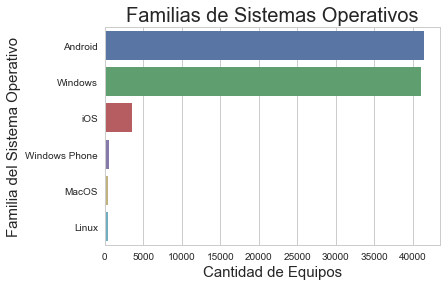

In [15]:
## AHORA MOSTRAMOS UN PRIMER GRÁFICO.
g = sns.barplot(x=sistemas.head(6).values, y=sistemas.head(6).index, orient='h')
g.set_title("Familias de Sistemas Operativos", fontsize=20)
g.set_xlabel("Cantidad de Equipos", fontsize=15)
g.set_ylabel("Familia del Sistema Operativo", fontsize=15)

In [32]:
## ACA PASAMOS LAS COLUMNAS QUE TIENEN UNA CANTIDAD DE VALORES LIMITADA A UN TIPO CATEGORY
eventos['event'] = eventos['event'].astype('category')
eventos['condition'] = eventos['condition'].astype('category')
eventos['storage'] = eventos['storage'].astype('category')
eventos['search_engine'] = eventos['search_engine'].astype('category')
eventos['channel'] = eventos['channel'].astype('category')
eventos['new_vs_returning'] = eventos['new_vs_returning'].astype('category')
eventos['device_type'] = eventos['device_type'].astype('category')
eventos['sistema'] = eventos['sistema'].astype('category')
eventos['timestamp'] = pd.to_datetime(eventos['timestamp'], infer_datetime_format=True)

<h2>
    Preguntas para contestar sobre el set de datos: 
    <br/>
    (Despues discutimos cuales ponemos y cuales sacamos, pero la idea es ir poniendo preguntas interesantes aca)
</h2>
<ul>
    <li><h5>Como evoluciono la cantidad de visitas a la home del sitio en el tiempo?</h5></li>
    <li><h5>De que forma se llega mas al sitio, ad campain o search engine?</h5></li>
    <li><h5>Mediante que motor de busqueda se llega mas al sitio?</h5></li>
    <li><h5>Cuales son las marcas y modelos más visitados/comprados?</h5>
    <li><h5>Si un usuario marco como lead en un producto, ver cuantas veces termina comprandolo.</h5></li>
</ul>


,timestamp,event,person,url,sku,model,condition,storage,color,skus,search_term,staticpage,campaign_source,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,sistema
122443,2018-06-15 23:59:12,viewed product,208473cf,NaN,1326,iPhone 6,Muito Bom,64GB,Prateado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
122444,2018-06-15 23:59:14,viewed product,208473cf,NaN,1325,iPhone 6,Excelente,64GB,Prateado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
122445,2018-06-15 23:59:20,viewed product,208473cf,NaN,1349,iPhone 6,Excelente,128GB,Prateado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
122446,2018-06-15 23:59:23,viewed product,208473cf,NaN,1325,iPhone 6,Excelente,64GB,Prateado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
122447,2018-06-15 23:59:31,checkout,208473cf,NaN,1325,iPhone 6,Excelente,64GB,Prateado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
